In [275]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/home/lili/Downloads/Telegram Desktop/data mining/tamrin 3/cleaned_data.csv')

# Display the first few rows of the data


Data Splitting for Training and Testing

In [276]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Decision Tree Implementation with Gini Criterion

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Decision Tree model with Gini criterion
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42, class_weight='balanced')
dt_gini.fit(X_train, y_train)

# Predict on the test set
y_gini_pred = dt_gini.predict(X_test)

# Evaluate the model
print("Decision Tree (Gini) Accuracy:", accuracy_score(y_test, y_gini_pred))
print("Classification Report (Gini):\n", classification_report(y_test, y_gini_pred))
print("Confusion Matrix (Gini):\n", confusion_matrix(y_test, y_gini_pred))


Decision Tree (Gini) Accuracy: 0.7700587084148728
Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.97      0.78      0.86       960
           1       0.16      0.66      0.26        62

    accuracy                           0.77      1022
   macro avg       0.57      0.72      0.56      1022
weighted avg       0.92      0.77      0.83      1022

Confusion Matrix (Gini):
 [[746 214]
 [ 21  41]]


Confusion Matrix for gini

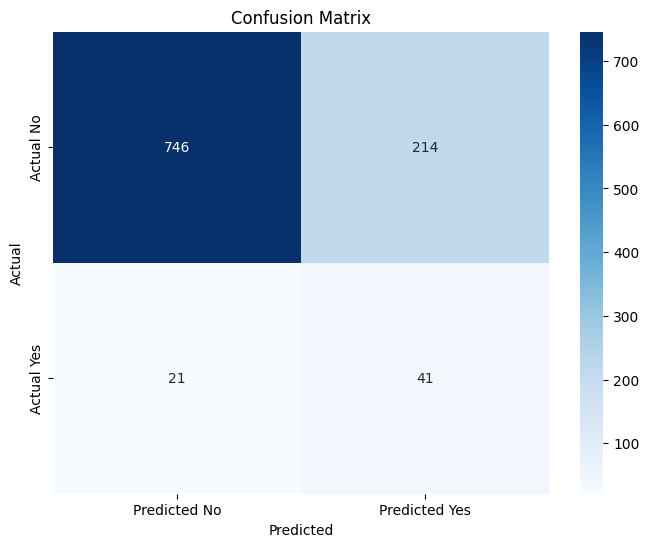

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_gini_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision Tree Rules

In [279]:
from sklearn.tree import export_text

# Extract and display rules (sample)
gini_rules = export_text(dt_gini, feature_names=list(X.columns))
print("Decision Tree Rules (Gini):\n", gini_rules[:2000])  # Display a sample of the rules


Decision Tree Rules (Gini):
 |--- age <= 0.19
|   |--- age <= -0.25
|   |   |--- avg_glucose_level <= -1.30
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  -1.30
|   |   |   |--- class: 0
|   |--- age >  -0.25
|   |   |--- work_type <= 1.00
|   |   |   |--- class: 0
|   |   |--- work_type >  1.00
|   |   |   |--- class: 0
|--- age >  0.19
|   |--- age <= 1.07
|   |   |--- avg_glucose_level <= 0.29
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  0.29
|   |   |   |--- class: 1
|   |--- age >  1.07
|   |   |--- avg_glucose_level <= -1.30
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  -1.30
|   |   |   |--- class: 1



Decision Tree Implementation with Entropy Criterion

In [280]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Decision Tree model with Entropy criterion and balanced class weights
dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42, class_weight='balanced')
dt_entropy.fit(X_resampled, y_resampled)

# Predict on the test set
y_entropy_pred = dt_entropy.predict(X_test)

# Evaluate the model
print("Decision Tree (Entropy) Accuracy:", accuracy_score(y_test, y_entropy_pred))
print("Classification Report (Entropy):\n", classification_report(y_test, y_entropy_pred))
print("Confusion Matrix (Entropy):\n", confusion_matrix(y_test, y_entropy_pred))


Decision Tree (Entropy) Accuracy: 0.7485322896281801
Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.74      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022

Confusion Matrix (Entropy):
 [[719 241]
 [ 16  46]]


Confusion Matrix for entropy

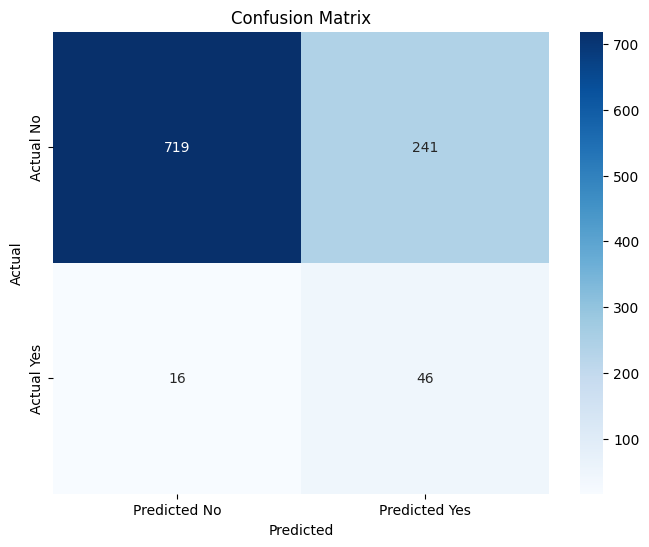

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_entropy_pred )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision Tree Rules

In [282]:
# Extract and display rules (sample)
entropy_rules = export_text(dt_entropy, feature_names=list(X.columns))
print("Decision Tree Rules (Entropy):\n", entropy_rules[:2000])  # Display a sample of the rules


Decision Tree Rules (Entropy):
 |--- age <= 0.30
|   |--- age <= -0.27
|   |   |--- bmi <= -0.50
|   |   |   |--- class: 0
|   |   |--- bmi >  -0.50
|   |   |   |--- class: 0
|   |--- age >  -0.27
|   |   |--- gender <= 0.50
|   |   |   |--- class: 0
|   |   |--- gender >  0.50
|   |   |   |--- class: 0
|--- age >  0.30
|   |--- age <= 1.01
|   |   |--- avg_glucose_level <= -0.11
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  -0.11
|   |   |   |--- class: 1
|   |--- age >  1.01
|   |   |--- work_type <= 2.50
|   |   |   |--- class: 1
|   |   |--- work_type >  2.50
|   |   |   |--- class: 1



Decision Tree Implementation with Log Loss Criterion


In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Initialize Decision Tree with Log Loss criterion
dt_log_loss = DecisionTreeClassifier(criterion='log_loss', max_depth=3, random_state=42)
dt_log_loss.fit(X_resampled, y_resampled)

# Predict on the test set
y_log_loss_pred = dt_log_loss.predict(X_test)

# Evaluate the model
print("Decision Tree (Log Loss) Accuracy:", accuracy_score(y_test, y_log_loss_pred))
print("Classification Report (Log Loss):\n", classification_report(y_test, y_log_loss_pred))
print("Confusion Matrix (Log Loss):\n", confusion_matrix(y_test, y_log_loss_pred))


Decision Tree (Log Loss) Accuracy: 0.7485322896281801
Classification Report (Log Loss):
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.74      0.26        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022

Confusion Matrix (Log Loss):
 [[719 241]
 [ 16  46]]


Confusion Matrix for log loss

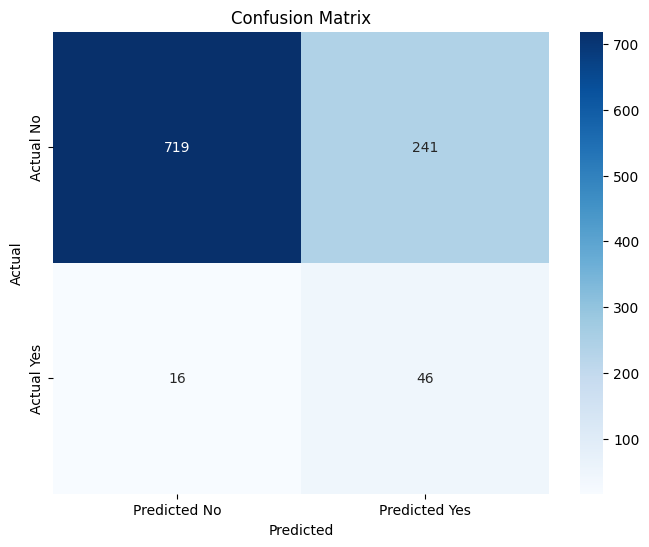

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns


conf_matrix = confusion_matrix(y_test, y_log_loss_pred )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Decision Tree Rules

In [285]:
# Extract and display rules (sample)
entropy_rules = export_text(dt_log_loss, feature_names=list(X.columns))
print("Decision Tree Rules (log_loss):\n", entropy_rules[:2000])  # Display a sample of the rules

Decision Tree Rules (log_loss):
 |--- age <= 0.30
|   |--- age <= -0.27
|   |   |--- bmi <= -0.50
|   |   |   |--- class: 0
|   |   |--- bmi >  -0.50
|   |   |   |--- class: 0
|   |--- age >  -0.27
|   |   |--- gender <= 0.50
|   |   |   |--- class: 0
|   |   |--- gender >  0.50
|   |   |   |--- class: 0
|--- age >  0.30
|   |--- age <= 1.01
|   |   |--- avg_glucose_level <= -0.11
|   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  -0.11
|   |   |   |--- class: 1
|   |--- age >  1.01
|   |   |--- work_type <= 2.50
|   |   |   |--- class: 1
|   |   |--- work_type >  2.50
|   |   |   |--- class: 1



Random Forest Implementation

In [286]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest model with balanced class weights
rf_model = RandomForestClassifier(n_estimators=300, random_state=84, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)


# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_rf_pred))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_rf_pred))


Random Forest Accuracy: 0.8776908023483366
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       960
           1       0.16      0.24      0.19        62

    accuracy                           0.88      1022
   macro avg       0.56      0.58      0.56      1022
weighted avg       0.90      0.88      0.89      1022

Confusion Matrix (Random Forest):
 [[882  78]
 [ 47  15]]


Confusion Matrix for RandomForest

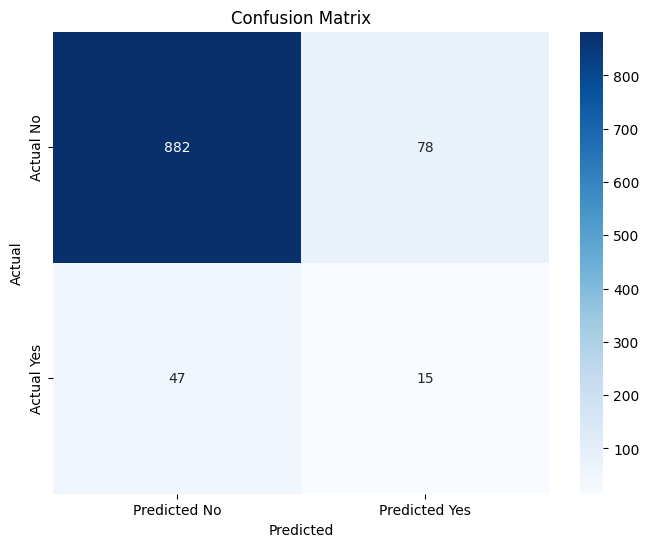

In [287]:
conf_matrix = confusion_matrix(y_test, y_rf_pred )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Comparison of Results Across Different Criteria

In [289]:
import pandas as pd


# Create a comparison table
comparison_data = {
    'Model': ['Decision Tree (Gini)', 'Decision Tree (Entropy)', 'Decision Tree (log loss)', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_gini_pred),
        accuracy_score(y_test, y_entropy_pred),
        accuracy_score(y_test, y_rf_pred),
        accuracy_score(y_test, y_log_loss_pred )
    ],
    'Precision (Stroke)': [
        classification_report(y_test, y_gini_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_entropy_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_rf_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_log_loss_pred , output_dict=True)['1']['precision']
    ],
    'Recall (Stroke)': [
        classification_report(y_test, y_gini_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_entropy_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_rf_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_log_loss_pred , output_dict=True)['1']['recall']
    ],
    'F1 Score (Stroke)': [
        classification_report(y_test, y_gini_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_entropy_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_rf_pred, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_log_loss_pred , output_dict=True)['1']['f1-score']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison:\n", comparison_df)


Model Comparison:
                       Model  Accuracy  Precision (Stroke)  Recall (Stroke)  \
0      Decision Tree (Gini)  0.770059            0.160784         0.661290   
1   Decision Tree (Entropy)  0.748532            0.160279         0.741935   
2  Decision Tree (log loss)  0.877691            0.161290         0.241935   
3             Random Forest  0.748532            0.160279         0.741935   

   F1 Score (Stroke)  
0           0.258675  
1           0.263610  
2           0.193548  
3           0.263610  
